In [98]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score

import warnings
warnings.filterwarnings ('ignore')
from sklearn.svm import SVR
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [100]:
nRowsRead = 1259

df1 = pd.read_csv('MagicBricks.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MagicBricks.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1259 rows and 11 columns


In [101]:
df1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [102]:
df1.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [103]:
df1.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [105]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1254,False
1255,False
1256,False
1257,False


In [106]:
df1.isnull().sum()

,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Locality,0
Parking,33
Price,0
Status,0
Transaction,0
Type,5


In [107]:
df1.drop('Per_Sqft',axis=1,inplace=True)

In [108]:
df1.drop('Locality',axis=1,inplace=True)

In [109]:
df1.Bathroom.fillna(df1.Bathroom.median(),inplace=True)
df1.Type.fillna('Apartment',inplace=True)
df1.Furnishing.fillna('Semi-Furnished',inplace=True)

In [110]:
df1.Parking.fillna(0,inplace=True)

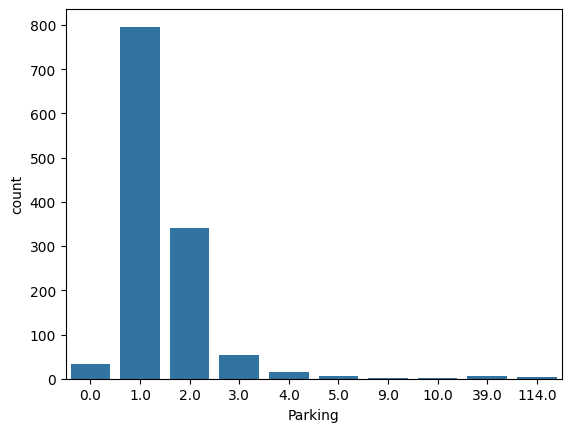

In [111]:
sns.countplot(x ='Parking', data = df1)
plt.show()

In [112]:
df1.drop(df1[df1.Parking > 10].index, inplace=True)

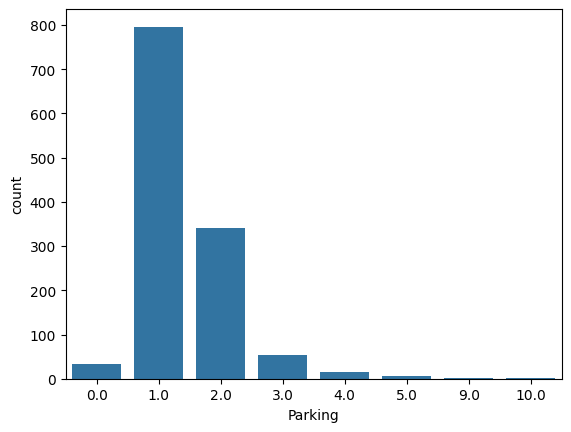

In [113]:
sns.countplot(x ='Parking', data = df1)
plt.show()

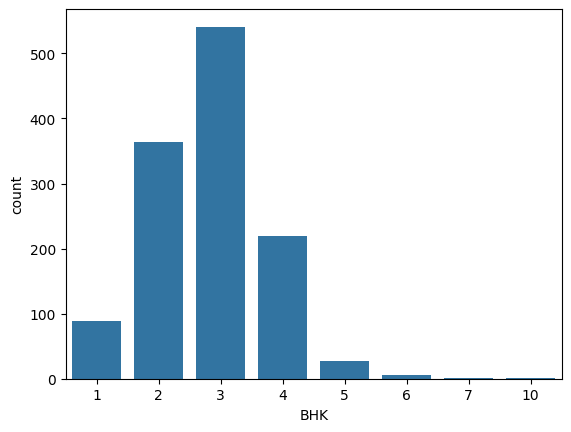

In [114]:
sns.countplot(x='BHK',data=df1)
plt.show()

In [115]:
df1['BHK'].value_counts()

,count
BHK,
3,541
2,364
4,220
1,89
5,27
6,6
7,1
10,1


In [116]:
df1.drop(df1[df1.BHK > 5].index, inplace=True)

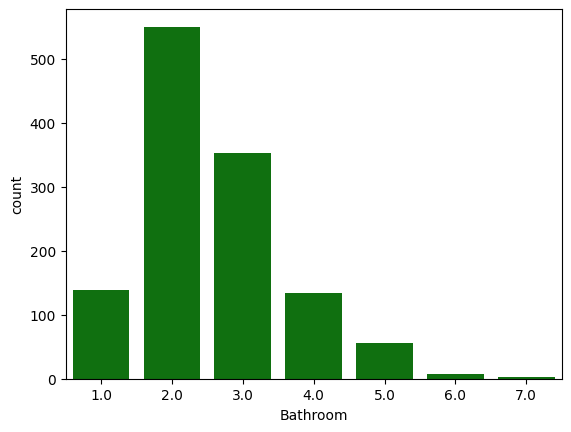

In [117]:
sns.countplot(x='Bathroom',data=df1,color='g')
plt.show()

In [118]:
df1.drop('Bathroom',axis=1,inplace=True)

<Axes: xlabel='Furnishing'>

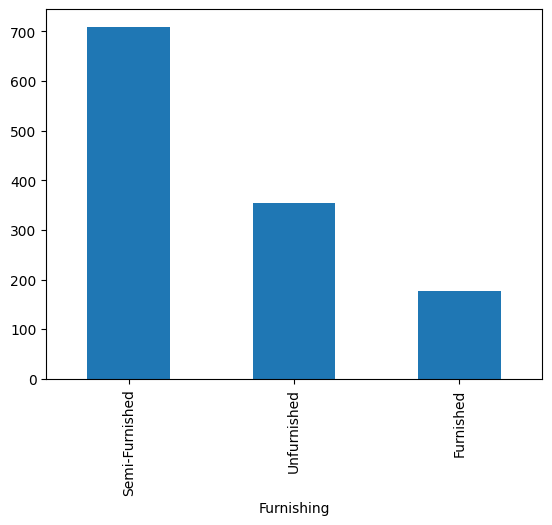

In [119]:
df1.Furnishing.value_counts().plot.bar()

<Axes: xlabel='Furnishing', ylabel='Price'>

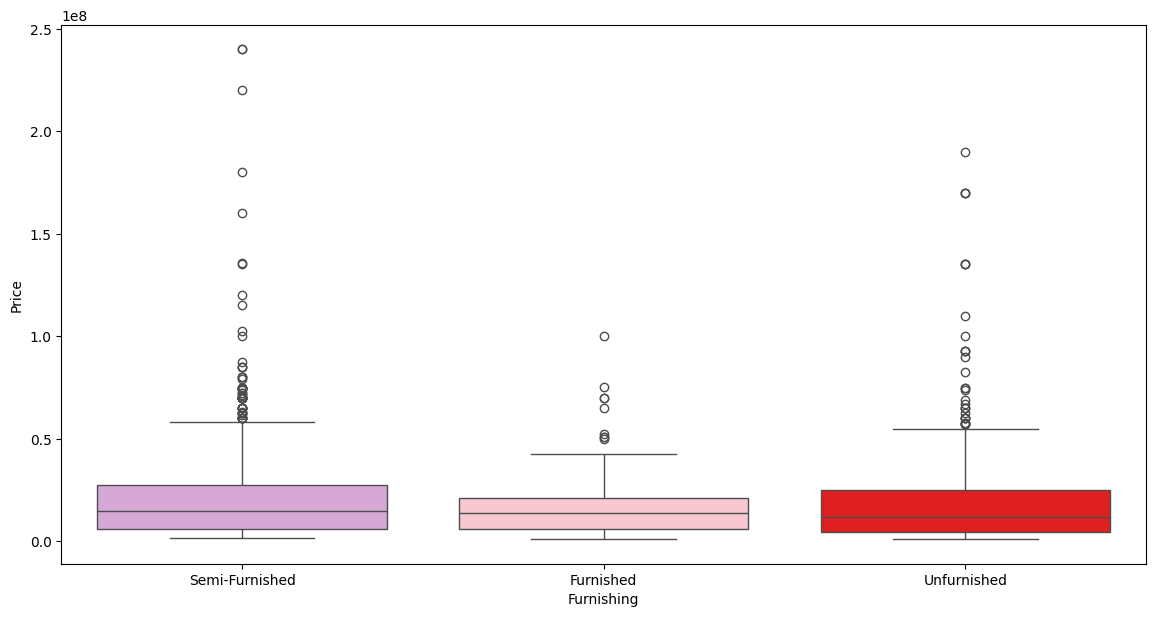

In [120]:
plt.figure(figsize=(14,7))
palette=['plum','pink','r']
sns.boxplot(x=df1.Furnishing,y=df1.Price,palette=palette)

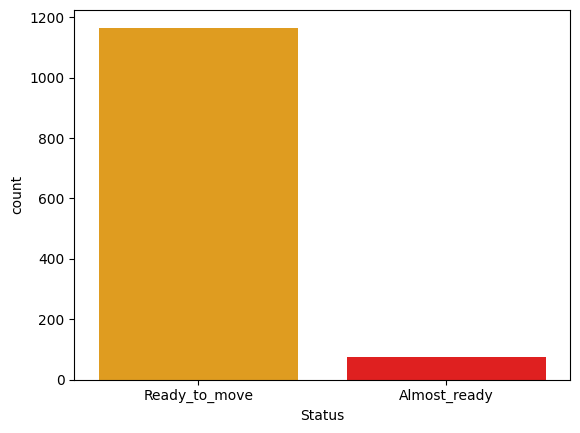

In [121]:
palette=['orange','r']
sns.countplot(x='Status',data=df1,palette=palette)
plt.show()

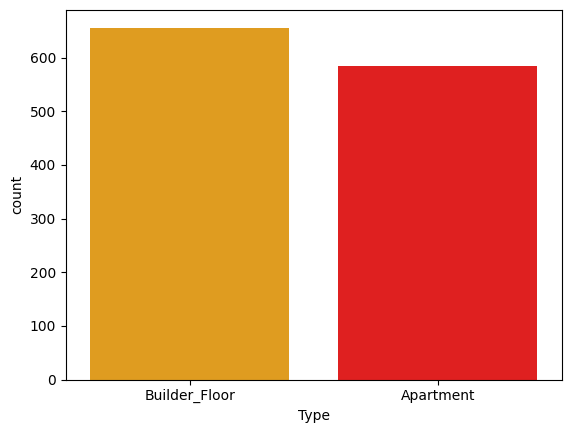

In [122]:
palette=['orange','r']
sns.countplot(x='Type',data=df1,palette=palette)
plt.show()

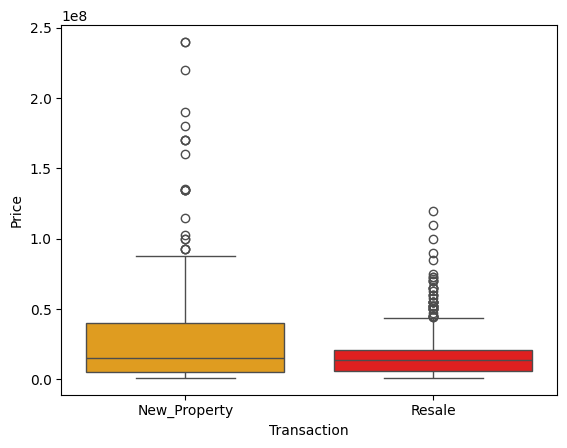

In [123]:
palette=['orange','r']
sns.boxplot(x='Transaction',y='Price',data=df1,palette=palette)
plt.show()

<Axes: xlabel='Area', ylabel='Price'>

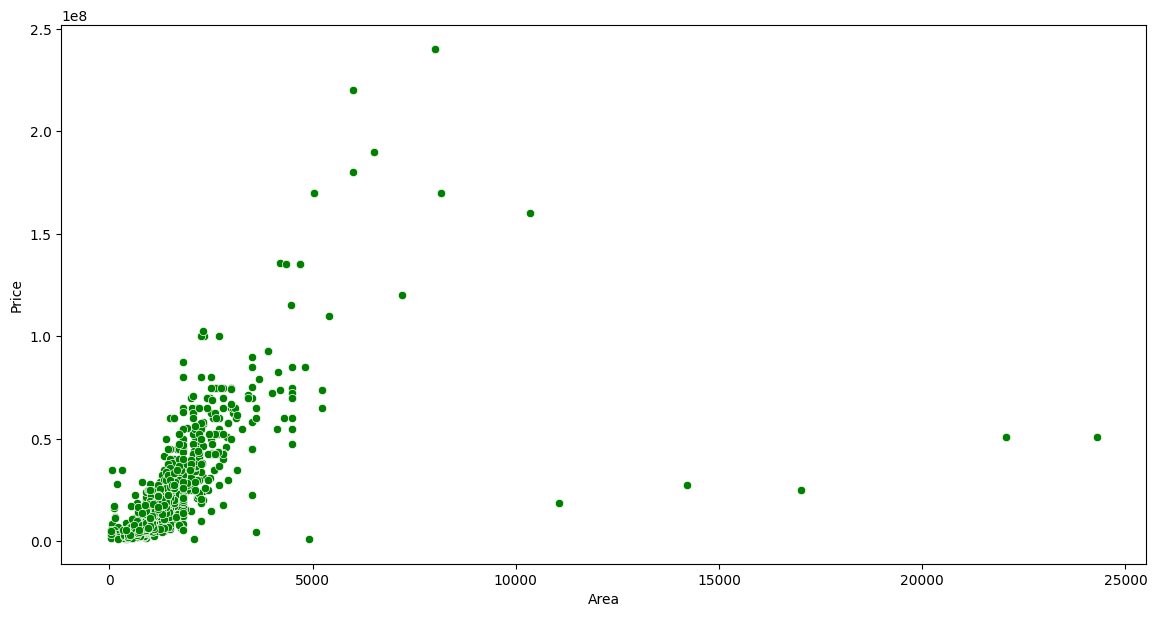

In [124]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Area',y='Price',data=df1,color='g')

In [125]:
df1

,Area,BHK,Furnishing,Parking,Price,Status,Transaction,Type
0,800.0,3,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...
1254,4118.0,4,Unfurnished,3.0,55000000,Ready_to_move,New_Property,Builder_Floor
1255,1050.0,3,Semi-Furnished,3.0,12500000,Ready_to_move,Resale,Builder_Floor
1256,875.0,3,Semi-Furnished,3.0,17500000,Ready_to_move,New_Property,Builder_Floor
1257,990.0,2,Unfurnished,1.0,11500000,Ready_to_move,Resale,Builder_Floor


In [126]:
df1 = pd.get_dummies(df1)

In [127]:
for col in df1.columns:
    if df1[col].dtype != bool:
        m = max(df1[col])
        df1[col] = df1[col]/m

In [128]:
df1

,Area,BHK,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.1,0.027083,False,True,False,False,True,True,False,False,True
1,0.030864,0.4,0.1,0.020833,False,True,False,False,True,True,False,True,False
2,0.039095,0.4,0.1,0.064583,True,False,False,False,True,False,True,True,False
3,0.024691,0.4,0.1,0.017500,False,True,False,False,True,False,True,False,True
4,0.026749,0.4,0.1,0.025833,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.169465,0.8,0.3,0.229167,False,False,True,False,True,True,False,False,True
1255,0.043210,0.6,0.3,0.052083,False,True,False,False,True,False,True,False,True
1256,0.036008,0.6,0.3,0.072917,False,True,False,False,True,True,False,False,True
1257,0.040741,0.4,0.1,0.047917,False,False,True,False,True,False,True,False,True


In [129]:
df1.corr()

,Area,BHK,Parking,Price,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
Area,1.000000,0.462268,0.240603,0.578652,-0.059367,0.072966,-0.033965,0.158704,-0.158704,0.119966,-0.119966,-0.090747,0.090747
BHK,0.462268,1.000000,0.271055,0.602738,0.008317,0.087703,-0.102478,0.133248,-0.133248,0.166593,-0.166593,-0.100601,0.100601
Parking,0.240603,0.271055,1.000000,0.371125,0.013610,0.002757,-0.013551,0.022833,-0.022833,0.061661,-0.061661,-0.077274,0.077274
Price,0.578652,0.602738,0.371125,1.000000,-0.072742,0.063579,-0.013337,0.188344,-0.188344,0.223313,-0.223313,-0.116736,0.116736
Furnishing_Furnished,-0.059367,0.008317,0.013610,-0.072742,1.000000,-0.470851,-0.258174,-0.006740,0.006740,-0.136910,0.136910,0.090308,-0.090308
Furnishing_Semi-Furnished,0.072966,0.087703,0.002757,0.063579,-0.470851,1.000000,-0.730743,-0.067295,0.067295,0.144172,-0.144172,-0.098568,0.098568
Furnishing_Unfurnished,-0.033965,-0.102478,-0.013551,-0.013337,-0.258174,-0.730743,1.000000,0.078909,-0.078909,-0.051940,0.051940,0.038060,-0.038060
Status_Almost_ready,0.158704,0.133248,0.022833,0.188344,-0.006740,-0.067295,0.078909,1.000000,-1.000000,0.258931,-0.258931,0.031469,-0.031469
Status_Ready_to_move,-0.158704,-0.133248,-0.022833,-0.188344,0.006740,0.067295,-0.078909,-1.000000,1.000000,-0.258931,0.258931,-0.031469,0.031469
Transaction_New_Property,0.119966,0.166593,0.061661,0.223313,-0.136910,0.144172,-0.051940,0.258931,-0.258931,1.000000,-1.000000,-0.233657,0.233657


In [130]:
df1.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
BHK,0.602738
Area,0.578652
Parking,0.371125
Transaction_New_Property,0.223313
Status_Almost_ready,0.188344
Type_Builder_Floor,0.116736
Furnishing_Semi-Furnished,0.063579
Furnishing_Unfurnished,-0.013337
Furnishing_Furnished,-0.072742


In [131]:
Y = df1.Price
X = df1.drop('Price',axis=1)

In [132]:
X

,Area,BHK,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
0,0.032922,0.6,0.1,False,True,False,False,True,True,False,False,True
1,0.030864,0.4,0.1,False,True,False,False,True,True,False,True,False
2,0.039095,0.4,0.1,True,False,False,False,True,False,True,True,False
3,0.024691,0.4,0.1,False,True,False,False,True,False,True,False,True
4,0.026749,0.4,0.1,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0.169465,0.8,0.3,False,False,True,False,True,True,False,False,True
1255,0.043210,0.6,0.3,False,True,False,False,True,False,True,False,True
1256,0.036008,0.6,0.3,False,True,False,False,True,True,False,False,True
1257,0.040741,0.4,0.1,False,False,True,False,True,False,True,False,True


In [133]:
Y

,Price
0,0.027083
1,0.020833
2,0.064583
3,0.017500
4,0.025833
...,...
1254,0.229167
1255,0.052083
1256,0.072917
1257,0.047917


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [135]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

num_features = X_train_df.select_dtypes(exclude=['object']).columns
cat_features = X_train_df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ('StandardScaler', numeric_transformer, num_features),
        ('OneHotEncoder', categorical_transformer, cat_features)
    ])



Index(['Area', 'BHK', 'Parking', 'Furnishing_Furnished',
       'Furnishing_Semi-Furnished', 'Furnishing_Unfurnished',
       'Status_Almost_ready', 'Status_Ready_to_move',
       'Transaction_New_Property', 'Transaction_Resale', 'Type_Apartment',
       'Type_Builder_Floor'],
      dtype='object')
Index([], dtype='object')


In [136]:
X=preprocessor.fit_transform(X)

In [137]:
X.shape

(1241, 12)

In [138]:
X

array([[-0.42553711,  0.24177093, -0.51470092, ..., -1.26773138,
        -0.94433484,  0.94433484],
       [-0.4574138 , -0.87777283, -0.51470092, ..., -1.26773138,
         1.05894642, -1.05894642],
       [-0.32990704, -0.87777283, -0.51470092, ...,  0.78881064,
         1.05894642, -1.05894642],
       ...,
       [-0.37772207,  0.24177093,  2.00499865, ..., -1.26773138,
        -0.94433484,  0.94433484],
       [-0.30440569, -0.87777283, -0.51470092, ...,  0.78881064,
        -0.94433484,  0.94433484],
       [ 6.10918443,  0.24177093, -0.51470092, ..., -1.26773138,
        -0.94433484,  0.94433484]])

In [139]:
X_train

,Area,BHK,Parking,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
31,0.032922,0.4,0.1,False,False,True,False,True,True,False,False,True
1024,0.054815,0.6,0.1,False,True,False,False,True,False,True,False,True
935,0.016461,0.2,0.1,False,False,True,False,True,False,True,False,True
678,0.084979,0.6,0.2,False,True,False,False,True,False,True,True,False
860,0.023251,0.4,0.1,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,0.065432,0.6,0.2,False,False,True,False,True,True,False,True,False
1113,0.067490,0.6,0.1,False,False,True,False,True,False,True,True,False
1148,0.074074,0.8,0.1,False,True,False,False,True,False,True,True,False
868,0.018889,0.4,0.1,False,True,False,False,True,False,True,False,True


In [140]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [141]:
print(f'Training Accuracy: {lr.score(X_train,y_train)}')
print(f'Testing Accuracy: {lr.score(X_test,y_test)}')

Training Accuracy: 0.5122324742207923
Testing Accuracy: 0.5285620809906446


In [142]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [143]:
print(f'Training Accuracy:{gb.score(X_train,y_train)}')
print(f'Test Accuracy:{gb.score(X_test,y_test)}')

Training Accuracy:0.8936842522089855
Test Accuracy:0.8747739265573653


In [144]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [145]:
gb_model = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [146]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [147]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [148]:
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Model Mean Squared Error: 0.0016911828117209236
Best Model R-squared: 0.8915922228923826


In [149]:
param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}

In [150]:
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [151]:
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_random = best_model_random.predict(X_test)

In [152]:
accuracy_best_random = r2_score(y_test, y_pred_best_random)

print("Best Parameters (Randomized Search):", best_params_random)
print(f"Best Model Accuracy (Randomized Search): {accuracy_best_random}")

Best Parameters (Randomized Search): {'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.11555555555555555}
Best Model Accuracy (Randomized Search): 0.877425273488098


In [153]:
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [154]:
print(f'Training Accuracy:{XGB.score(X_train,y_train)}')
print(f'Test Accuracy:{XGB.score(X_test,y_test)}')

Training Accuracy:0.9689676705552952
Test Accuracy:0.8710872116161579


In [160]:
Y_pred_train = XGB.predict(X_train)
Y_pred_test = XGB.predict(X_test)

In [161]:
def training_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)


    print (f'MSE = {mse}')

    print (f'RMSE = {rmse}')
    print (f'MAE = {mae}')
    print (f'Accuracy = {r2}')

    plt.scatter(actual,predicted , color = 'r')
    plt.plot([actual.min() , actual.max()],[actual.min() , actual.max()] ,color = 'k' , lw = 2 , ls = '--')



    plt.title('Scatter Plot of Y_test vs Y_pred_train')
    plt.xlabel('Actual Values (Y_train)')
    plt.ylabel('Predicted Values (Y_pred_train)')
    plt.show()



MSE = 0.0003136857067160587
RMSE = 0.017711174628354233
MAE = 0.009795359849812143
Accuracy = 0.9689676705552952


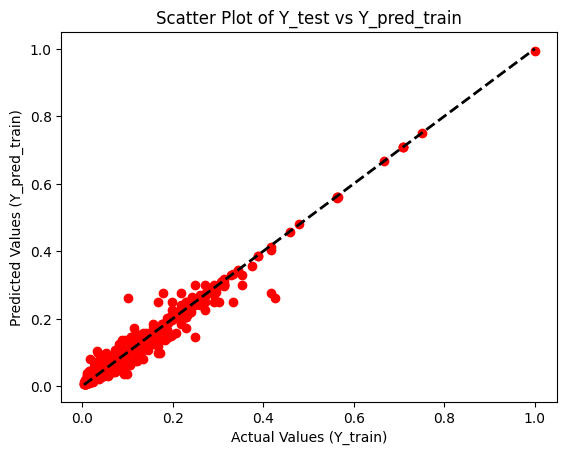

In [162]:
training_evaluation(y_train,Y_pred_train)

In [163]:
def test_evaluation(actual,predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)


    print (f'MSE = {mse}')

    print (f'RMSE = {rmse}')
    print (f'MAE = {mae}')
    print (f'Accuracy = {r2}')

    plt.scatter(actual,predicted , color = 'g')
    plt.plot( [actual.min() , actual.max()],[actual.min() , actual.max()] ,color = 'k' , lw = 2 , ls = '--' )

    plt.title('Scatter Plot of y_test vs y_pred_test')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values (y_pred_test)')
    plt.show()

MSE = 0.002011065052181128
RMSE = 0.04484489995730984
MAE = 0.025162554740267424
Accuracy = 0.8710872116161579


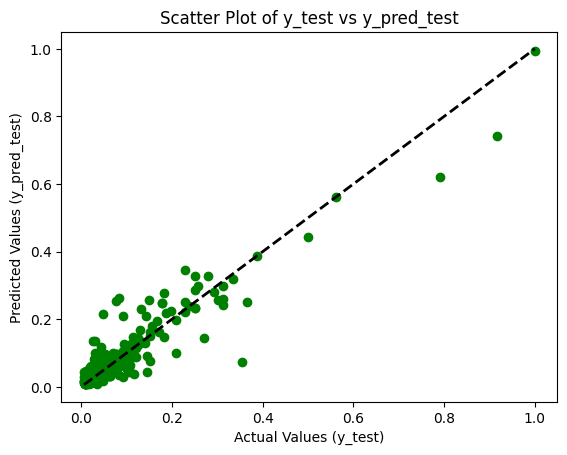

In [164]:
test_evaluation(y_test,Y_pred_test)